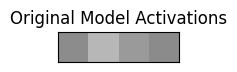

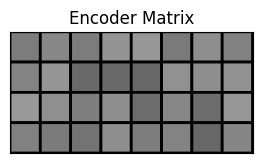

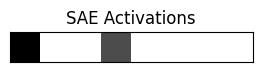

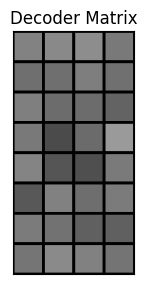

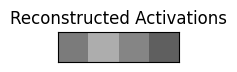

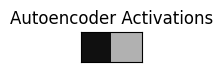

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(vector, title, output_file):
    # Set each cell to have a specific size in cm
    cell_size = 1  # size of each cell in cm
    fig, ax = plt.subplots(figsize=(len(vector) * cell_size / 2.54, cell_size / 2.54))  # Convert cm to inches
    ax.imshow(vector[np.newaxis, :], cmap="gray", aspect="equal", vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_matrix(matrix, title, output_file):
    # Set each cell to have a specific size in cm
    cell_width = matrix.shape[1] * 1  # width in cm
    cell_height = matrix.shape[0] * 1  # height in cm
    fig, ax = plt.subplots(figsize=(cell_width / 2.54, cell_height / 2.54))  # Convert cm to inches
    c = ax.pcolor(matrix, edgecolors='k', linewidths=2, cmap="gray", vmin=0, vmax=1)
    ax.set_aspect('equal')  # Ensures cells are square
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_title(title)
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close()

np.random.seed(0)

# Original model activations
original_activations = np.random.rand(4)
plot_vector(original_activations, 'Original Model Activations', 'original_activations.png')

# Encoder matrix
encoder_matrix = np.random.uniform(low=0.4, high=0.6, size=(4, 8))
plot_matrix(encoder_matrix, 'Encoder Matrix', 'encoder_matrix.png')

# SAE activations (after ReLU)
sae_activations = np.array([0, 1, 1, 0.3, 1, 1, 1, 1])
plot_vector(sae_activations, 'SAE Activations', 'sae_activations.png')

# Decoder matrix
decoder_noise = np.random.normal(-0.05, 0.05, encoder_matrix.T.shape)  # Noise for the transposed matrix
decoder_matrix = encoder_matrix.T + decoder_noise
plot_matrix(decoder_matrix, 'Decoder Matrix', 'decoder_matrix.png')

# Reconstructed activations
noise = np.random.normal(0, 0.1, original_activations.shape)  # Adding Gaussian noise
reconstructed_activations = original_activations + noise
plot_vector(reconstructed_activations, 'Reconstructed Activations', 'reconstructed_activations.png')

# AE activation
original_activations = np.random.rand(2)
plot_vector(original_activations, 'Autoencoder Activations', 'ae_activations.png')


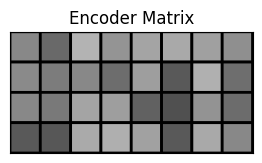

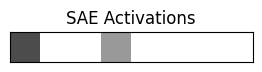

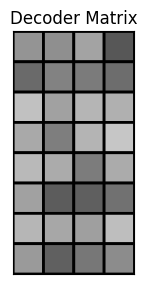

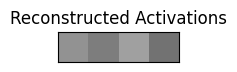

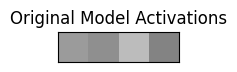

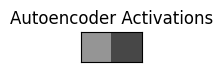

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(vector, title, output_file):
    # Set each cell to have a specific size in cm
    cell_size = 1  # size of each cell in cm
    fig, ax = plt.subplots(figsize=(len(vector) * cell_size / 2.54, cell_size / 2.54))  # Convert cm to inches
    ax.imshow(vector[np.newaxis, :], cmap="gray_r", aspect="equal", vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_matrix(matrix, title, output_file):
    # Set each cell to have a specific size in cm
    cell_width = matrix.shape[1] * 1  # width in cm
    cell_height = matrix.shape[0] * 1  # height in cm
    fig, ax = plt.subplots(figsize=(cell_width / 2.54, cell_height / 2.54))  # Convert cm to inches
    c = ax.pcolor(matrix, edgecolors='k', linewidths=2, cmap="gray_r", vmin=0, vmax=1)
    ax.set_aspect('equal')  # Ensures cells are square
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_title(title)
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close()

np.random.seed(1)

# Encoder matrix
encoder_matrix = np.random.uniform(low=0.3, high=0.7, size=(4, 8))
plot_matrix(encoder_matrix, 'Encoder Matrix', 'encoder_matrix.png')

# SAE activations (after ReLU)
sae_activations = np.array([0.7, 0, 0, 0.4, 0, 0, 0, 0])
plot_vector(sae_activations, 'SAE Activations', 'sae_activations.png')

# Decoder matrix
decoder_noise = np.random.normal(-0.05, 0.05, encoder_matrix.T.shape)  # Noise for the transposed matrix
decoder_matrix = encoder_matrix.T + decoder_noise
plot_matrix(decoder_matrix, 'Decoder Matrix', 'decoder_matrix.png')

# Reconstructed activations
reconstructed_activations = np.dot(sae_activations, decoder_matrix)
plot_vector(reconstructed_activations, 'Reconstructed Activations', 'reconstructed_activations.png')

# Original model activations
noise = np.random.normal(-0.05, 0.05, reconstructed_activations.shape)  # Adding Gaussian noise
original_activations = reconstructed_activations + noise
plot_vector(original_activations, 'Original Model Activations', 'original_activations.png')

# AE activation
np.random.seed(1)
original_activations = np.random.rand(2)
plot_vector(original_activations, 'Autoencoder Activations', 'ae_activations.png')


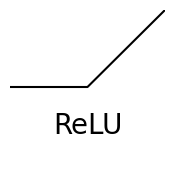

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_relu():
    x = np.linspace(-2, 2, 400)
    y = np.maximum(0, x)
    fig, ax = plt.subplots(figsize=(2, 2))  # Create a square plot
    ax.plot(x, y, color='black')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid(True)

    # Set title with a specific font size (commented out to place text within the plot)
    # ax.set_title('ReLU', fontsize=20)

    # Place 'ReLU' text below the line
    ax.text(0, -1, 'ReLU', fontsize=20, ha='center', va='center', color='black')

    # Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])

    # Hide all the borders
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.savefig('relu_symbol.png', bbox_inches='tight')
    plt.show()
    plt.close()

plot_relu()
